In [1]:
from sklearn.neighbors import KNeighborsClassifier
import csv
import pickle
import re
from datetime import datetime
import numpy as np
# randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from urllib import urlopen
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# page = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data")

votes = read_csv('votes.csv', header=0)
votes.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


# Supervised Learning Challenges

## Challenge 01 (completed)

In [3]:
len(votes)

435

In [4]:
for c in votes.columns:
    if c <> u'Class Name':
        votes[c] = votes[c].map({'y': 1, 'n': 0})

In [5]:
votes.columns

Index([u'Class Name', u'handicapped-infants', u'water-project-cost-sharing', u'adoption-of-the-budget-resolution', u'physician-fee-freeze', u'el-salvador-aid', u'religious-groups-in-schools', u'anti-satellite-test-ban', u'aid-to-nicaraguan-contras', u'mx-missile', u'immigration', u'synfuels-corporation-cutback', u'education-spending', u'superfund-right-to-sue', u'crime', u'duty-free-exports', u'export-administration-act-south-africa'], dtype='object')

In [6]:
(votes['Class Name'] == 'republican').sum()

168

In [7]:
(votes['Class Name'] == 'democrat').sum()

267

In [8]:
nan_d = []
nan_r = []
yes_d = []
yes_r = []
dem_votes = {}
rep_votes = {}
for c in votes.columns:
    if c <> u'Class Name':
        nan_dem = pd.isnull(votes[c][votes['Class Name'] == 'democrat']).sum()
        nan_rep = pd.isnull(votes[c][votes['Class Name'] == 'republican']).sum()
        yes_dem = (votes[c][votes['Class Name'] == 'democrat']).sum()/(267 - nan_dem)
        yes_rep = (votes[c][votes['Class Name'] == 'republican']).sum()/(168 - nan_rep)
        dem_votes.setdefault(c, [])
        rep_votes.setdefault(c, [])
        if yes_dem >= 0.5:
            dem_votes[c].append(1)
        else:
            dem_votes[c].append(0)

        if yes_rep >=0.5:
            rep_votes[c].append(1)
        else:
            rep_votes[c].append(0)
        nan_d.append(nan_dem)
        nan_r.append(nan_rep)
        yes_d.append((votes[c][votes['Class Name'] == 'democrat']).sum())
        yes_r.append((votes[c][votes['Class Name'] == 'republican']).sum())


In [9]:
dem_votes

{'adoption-of-the-budget-resolution': [1],
 'aid-to-nicaraguan-contras': [1],
 'anti-satellite-test-ban': [1],
 'crime': [0],
 'duty-free-exports': [1],
 'education-spending': [0],
 'el-salvador-aid': [0],
 'export-administration-act-south-africa': [1],
 'handicapped-infants': [1],
 'immigration': [0],
 'mx-missile': [1],
 'physician-fee-freeze': [0],
 'religious-groups-in-schools': [0],
 'superfund-right-to-sue': [0],
 'synfuels-corporation-cutback': [1],
 'water-project-cost-sharing': [1]}

In [10]:
rep_votes

{'adoption-of-the-budget-resolution': [0],
 'aid-to-nicaraguan-contras': [0],
 'anti-satellite-test-ban': [0],
 'crime': [1],
 'duty-free-exports': [0],
 'education-spending': [1],
 'el-salvador-aid': [1],
 'export-administration-act-south-africa': [1],
 'handicapped-infants': [0],
 'immigration': [1],
 'mx-missile': [0],
 'physician-fee-freeze': [1],
 'religious-groups-in-schools': [1],
 'superfund-right-to-sue': [1],
 'synfuels-corporation-cutback': [0],
 'water-project-cost-sharing': [1]}

In [11]:
for c in votes.columns:
    if c <> u'Class Name':
        for r in range(len(votes)):
            if pd.isnull(votes[c][r]):
                if votes['Class Name'][r] == 'democrat':
                    votes[c][r] = dem_votes[c][0]
                else:
                    votes[c][r] = rep_votes[c][0]


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
votes.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
9,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1


## Challenge 02 (completed)

In [165]:
from sklearn import cross_validation
house_votes = votes
X = votes.drop('Class Name', 1)
y = votes['Class Name']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)

y_test_votes = y_test
y_train_votes = y_train

print X.shape, X_train.shape, X_test.shape

(435, 16) (326, 16) (109, 16)


## Challenge 03 (completed)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [161]:
acc_scores = {}
for n in range(20):
    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores.setdefault((n+1), [])
    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred))


In [16]:
print acc_scores

{1: [0.90825688073394495], 2: [0.92660550458715596], 3: [0.94495412844036697], 4: [0.94495412844036697], 5: [0.94495412844036697], 6: [0.94495412844036697], 7: [0.94495412844036697], 8: [0.94495412844036697], 9: [0.94495412844036697], 10: [0.94495412844036697], 11: [0.93577981651376152], 12: [0.94495412844036697], 13: [0.94495412844036697], 14: [0.93577981651376152], 15: [0.92660550458715596], 16: [0.93577981651376152], 17: [0.92660550458715596], 18: [0.92660550458715596], 19: [0.90825688073394495], 20: [0.91743119266055051]}


In [17]:
max(acc_scores, key=acc_scores.get)

3

In [174]:
knn_model_votes = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_train_pred_votes = knn_model_votes.predict(X_train)
knn_test_pred_votes = knn_model_votes.predict(X_test)
knn_train_prob_votes = knn_model_votes.predict_proba(X_train)
knn_test_prob_votes = knn_model_votes.predict_proba(X_test)

## Challenge 04 (completed)

In [175]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
log_model_votes = log_model
log_test_pred_votes = y_pred
log_train_pred_votes = log_model.predict(X_train)
log_test_prob_votes = log_model.predict_proba(X_test)
log_train_prob_votes = log_model.predict_proba(X_train)
accuracy_score(y_test, y_pred)

0.97247706422018354

## Challenge 05 (completed)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<Container object of 2 artists>

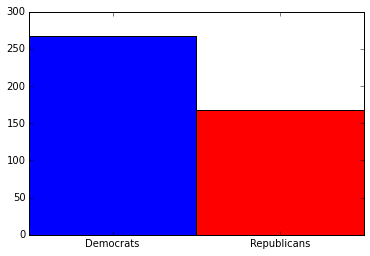

In [19]:
%pylab inline
parties = ['Democrats', 'Republicans']
voters = []
voters.append((votes['Class Name'] == 'democrat').sum())
voters.append((votes['Class Name'] == 'republican').sum())
pos = np.arange(len(parties))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(parties)
plt.bar(pos, voters, width, color=['blue', 'red'])

In [20]:
def dem_array(dem_ar):
    dem_ypred = []
    for i in range(len(dem_ar)):
        dem_ypred.append('democrat')
    
    return dem_ypred

def rep_array(rep_ar):
    rep_ypred = []
    for i in range(len(rep_ar)):
        rep_ypred.append('republican')
    
    return rep_ypred

y_dem = dem_array(votes)
y_rep = rep_array(votes)

In [21]:
y_actual = votes['Class Name']
dem_accur = accuracy_score(y_actual, y_dem)
dem_accur

0.61379310344827587

In [22]:
rep_accur = accuracy_score(y_actual, y_rep)
rep_accur

0.38620689655172413

## Challenge 06 (completed)

In [23]:
dem_y = []
rep_y =[]
for i in range(20):
    dem_y.append(dem_accur)
    rep_y.append(rep_accur)

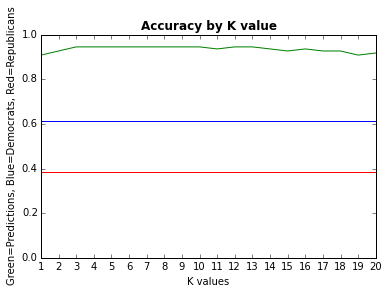

In [24]:
plt.ylim(0,1)
plt.xticks(range(len(acc_scores)), acc_scores.keys())
plt.title('Accuracy by K value', fontweight='bold')
plt.xlabel("K values")
plt.ylabel("Green=Predictions, Blue=Democrats, Red=Republicans")
plt.plot(range(len(acc_scores)), acc_scores.values(), color = 'g')
plt.plot(range(len(acc_scores)), dem_y, color = 'b')
plt.plot(range(len(acc_scores)), rep_y, color = 'r')

## Challenge 07 (completed)

In [25]:
from sklearn.learning_curve import learning_curve

In [26]:
train_sample_size, train_scores, test_scores = learning_curve(log_model, X_train, y_train)

In [27]:
train_sample_size

array([ 21,  70, 118, 167, 216])

In [28]:
train_scores

array([[ 0.95238095,  0.9047619 ,  0.9047619 ],
       [ 0.97142857,  0.95714286,  0.95714286],
       [ 0.98305085,  0.96610169,  0.96610169],
       [ 0.98203593,  0.97005988,  0.97005988],
       [ 0.98611111,  0.97222222,  0.97222222]])

In [29]:
test_scores

array([[ 0.86363636,  0.96296296,  0.9537037 ],
       [ 0.92727273,  0.98148148,  0.97222222],
       [ 0.92727273,  0.97222222,  0.9537037 ],
       [ 0.93636364,  0.98148148,  0.96296296],
       [ 0.94545455,  0.98148148,  0.96296296]])

In [30]:
train_cv_err = np.mean(train_scores,axis=1)
test_cv_err = np.mean(test_scores,axis=1)

In [31]:
train_cv_err

array([ 0.92063492,  0.96190476,  0.97175141,  0.9740519 ,  0.97685185])

In [32]:
test_cv_err

array([ 0.92676768,  0.96032548,  0.95106622,  0.96026936,  0.96329966])

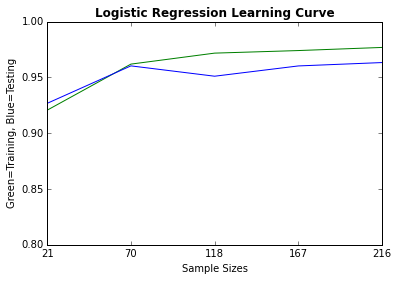

In [33]:
plt.ylim(0.8,1)
plt.xticks(range(len(train_sample_size)), train_sample_size)
plt.title('Logistic Regression Learning Curve', fontweight='bold')
plt.xlabel("Sample Sizes")
plt.ylabel("Green=Training, Blue=Testing")
plt.plot(range(len(train_cv_err)), train_cv_err, color = 'g')
plt.plot(range(len(test_cv_err)), test_cv_err, color = 'b')

In [34]:
Kmodel = KNeighborsClassifier(n_neighbors=3)

In [35]:
train_sample_size, train_scores, test_scores = learning_curve(Kmodel, X_train, y_train)

In [36]:
train_cv_err = np.mean(train_scores,axis=1)
test_cv_err = np.mean(test_scores,axis=1)

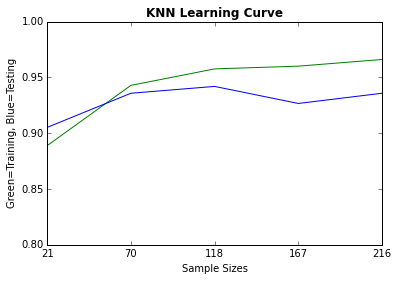

In [37]:
plt.ylim(0.8,1)
plt.xticks(range(len(train_sample_size)), train_sample_size)
plt.title('KNN Learning Curve', fontweight='bold')
plt.xlabel("Sample Sizes")
plt.ylabel("Green=Training, Blue=Testing")
plt.plot(range(len(train_cv_err)), train_cv_err, color = 'g')
plt.plot(range(len(test_cv_err)), test_cv_err, color = 'b')

## Challenge 08 (completed)

In [38]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
gnb_model = clf.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.96330275229357798

In [39]:
from sklearn.svm import SVC

clf = SVC()
svc_model = clf.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.97247706422018354

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
dtc_model = clf.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.95412844036697253

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
rf_model = clf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.96330275229357798

## Challenge 09 (completed)

In [42]:
from sklearn.cross_validation import cross_val_score

In [43]:
test_scores = cross_val_score(gnb_model, X_train, y_train)
test_scores
np.mean(test_scores)

0.92985409652076323

In [44]:
test_scores = cross_val_score(svc_model, X_train, y_train)
test_scores
np.mean(test_scores)

0.95106621773288424

In [45]:
test_scores = cross_val_score(dtc_model, X_train, y_train)
test_scores
np.mean(test_scores)

0.95409652076318741

In [46]:
test_scores = cross_val_score(rf_model, X_train, y_train)
test_scores
np.mean(test_scores)

0.95409652076318741

## Challenge 10 (completed)

In [47]:
votes2 = read_csv('votes.csv', header=0)
votes2.head(10)
for c in votes2.columns:
    if c <> u'Class Name':
        votes2[c] = votes2[c].map({'y': 1, 'n': 0})

In [48]:
votes2 = read_csv('votes.csv', header=0)
votes2.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [49]:
for c in votes2.columns:
    if c <> u'Class Name':
        votes2[c] = votes2[c].map({'y': 1, 'n': 0})

votes2.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [50]:
for c in votes2.columns:
    if c <> u'Class Name':
        for r in range(len(votes2)):
            if pd.isnull(votes2[c][r]):
                votes2[c][r] = votes2.mode()[c]


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
votes2.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [52]:
X = votes2.drop(votes2[['Class Name', 'crime']], axis=1)
y = votes2['crime']

In [53]:
X.head(5)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,duty-free-exports,export-administration-act-south-africa
0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1


In [54]:
y.head(5)

0    1
1    1
2    1
3    0
4    1
Name: crime, dtype: float64

In [55]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)
print X.shape, X_train.shape, X_test.shape

(435, 15) (326, 15) (109, 15)


In [56]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.80733944954128445

## Challenge 11 (Completed)

In [57]:
movies = read_csv('movies2.csv', header=0)
movies.head(10)

,Unnamed: 0,nominations,oscars,theaters,title,worldgross,year
0,0,3,0,3126,Star Wars: Episode I - The Phantom Menace,1027044677,1999-12-31 00:00:00
1,1,6,0,2821,The Sixth Sense,672806292,1999-12-31 00:00:00
2,2,1,0,3257,Toy Story 2,485015179,1999-12-31 00:00:00
3,3,1,0,3314,Austin Powers: The Spy Who Shagged Me,312016858,1999-12-31 00:00:00
4,4,4,4,2903,The Matrix,463517383,1999-12-31 00:00:00
5,5,1,1,3131,Tarzan,448191819,1999-12-31 00:00:00
6,6,1,0,3411,The Mummy,415933406,1999-12-31 00:00:00
7,7,1,0,3151,Stuart Little,300135367,1999-12-31 00:00:00
8,8,4,0,2875,The Green Mile,286801374,1999-12-31 00:00:00
9,9,8,5,1990,American Beauty,356296601,1999-12-31 00:00:00


In [58]:
len(movies)

544

In [59]:
movies['awarded'] = movies['oscars'] > 0

In [60]:
movies.head(5)

,Unnamed: 0,nominations,oscars,theaters,title,worldgross,year,awarded
0,0,3,0,3126,Star Wars: Episode I - The Phantom Menace,1027044677,1999-12-31 00:00:00,False
1,1,6,0,2821,The Sixth Sense,672806292,1999-12-31 00:00:00,False
2,2,1,0,3257,Toy Story 2,485015179,1999-12-31 00:00:00,False
3,3,1,0,3314,Austin Powers: The Spy Who Shagged Me,312016858,1999-12-31 00:00:00,False
4,4,4,4,2903,The Matrix,463517383,1999-12-31 00:00:00,True


In [61]:
mdw = movies[movies.awarded == True]
mdnw = movies[movies.awarded == False]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<Container object of 2 artists>

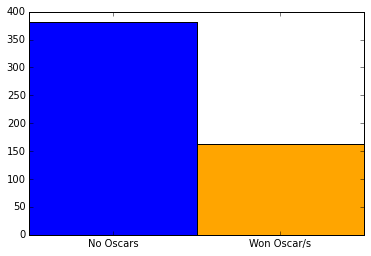

In [62]:
%pylab inline
xlabels = ['No Oscars', 'Won Oscar/s']
ydata=[len(mdnw), len(mdw)]
pos = np.arange(len(xlabels))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(xlabels)
plt.bar(pos, ydata, width, color=['blue', 'orange'])

In [63]:
X = movies[['nominations', 'theaters', 'worldgross']]
y = movies['awarded']

In [64]:
X.head(5)

,nominations,theaters,worldgross
0,3,3126,1027044677
1,6,2821,672806292
2,1,3257,485015179
3,1,3314,312016858
4,4,2903,463517383


In [65]:
y.head(5)

0    False
1    False
2    False
3    False
4     True
Name: awarded, dtype: bool

In [66]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)
print X.shape, X_train.shape, X_test.shape

(544, 3) (408, 3) (136, 3)


In [67]:
clf = KNeighborsClassifier(n_neighbors=1)
knn_model = clf.fit(X_train, y_train)
knn_movie = knn_model
y_pred = knn_model.predict(X_test)
y_pred_movie = y_pred
y_test_movie = y_test
accuracy_score(y_test, y_pred)

0.52941176470588236

In [68]:
clf = LogisticRegression()
log_model = clf.fit(X_train, y_train)
log_movie = log_model
y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.69852941176470584

In [69]:
y_base =[]
for i in range(len(y_test)):
    y_base.append(True)
    
accuracy_score(y_test, y_base)

0.3014705882352941

## Challenge 12

In [70]:
medical = read_csv('survival.csv', header=0)
medical.head(10)

,age,operation,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [71]:
mean(medical['age'])

52.457516339869279

In [72]:
std(medical['age'])

10.785785203631827

In [73]:
mean(medical['age'][medical['status'] == 1])

52.017777777777781

In [74]:
std(medical['age'][medical['status'] == 1])

10.987655475100514

In [75]:
mean(medical['age'][medical['status'] == 2])

53.679012345679013

In [76]:
std(medical['age'][medical['status'] == 2])

10.104182193031303

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


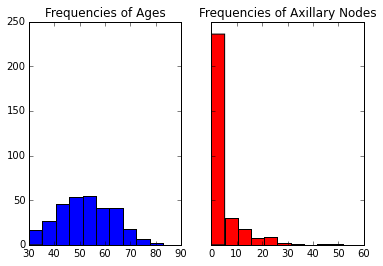

In [77]:
%pylab inline
xfeat1 = medical['age']
xfeat2 = medical['nodes']
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(xfeat1, color = 'b')
ax1.set_title('Frequencies of Ages')
ax2.hist(xfeat2, color = 'r')
ax2.set_title('Frequencies of Axillary Nodes')

In [78]:
min(medical['operation']) + 1900

1958

In [79]:
max(medical['operation']) + 1900

1969

In [80]:
y = medical['status']
X = medical[['age', 'nodes', 'operation']]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)
print X.shape, X_train.shape, X_test.shape

(306, 3) (229, 3) (77, 3)


In [81]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
log_med = log_model
y_pred = log_model.predict(X_test)
y_test_med = y_test
y_pred_med = y_pred
accuracy_score(y_test, y_pred)

0.61038961038961037

In [82]:
log_model.coef_

array([[ 0.02521773,  0.09810496, -0.04576608]])

#### Then, survival chances decrease with Age and Axillary Nodes, and decrease with Year of Operation.

In [83]:
train_sample_size, train_scores, test_scores = learning_curve(log_model, X_train, y_train)

In [84]:
train_cv_err = np.mean(train_scores,axis=1)
test_cv_err = np.mean(test_scores,axis=1)

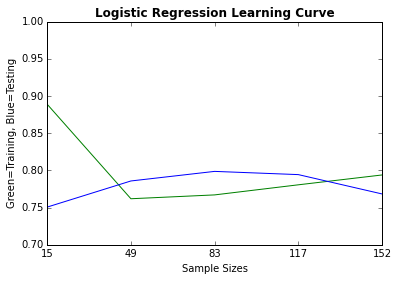

In [85]:
plt.ylim(0.7,1)
plt.xticks(range(len(train_sample_size)), train_sample_size)
plt.title('Logistic Regression Learning Curve', fontweight='bold')
plt.xlabel("Sample Sizes")
plt.ylabel("Green=Training, Blue=Testing")
plt.plot(range(len(train_cv_err)), train_cv_err, color = 'g')
plt.plot(range(len(test_cv_err)), test_cv_err, color = 'b')

## Classification Errors Challenges

Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

Challenge 2

For each, draw the ROC curve and calculate the AUC.

Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [86]:
from sklearn.metrics import precision_recall_fscore_support

## Classification Challenge 1 (completed)

In [169]:
accuracy_score(y_test_votes, knn_test_pred_votes)

0.94495412844036697

In [177]:
precision_recall_fscore_support(y_test_votes, knn_test_pred_votes, pos_label = None, average = None)

(array([ 0.98360656,  0.89583333]),
 array([ 0.92307692,  0.97727273]),
 array([ 0.95238095,  0.93478261]),
 array([65, 44]))

In [178]:
accuracy_score(y_test_votes, log_test_pred_votes)

0.97247706422018354

In [179]:
precision_recall_fscore_support(y_test_votes, log_test_pred_votes, pos_label = None, average = None)

(array([ 0.984375  ,  0.95555556]),
 array([ 0.96923077,  0.97727273]),
 array([ 0.97674419,  0.96629213]),
 array([65, 44]))

## Classification Challenge 2 (completed)

In [180]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [181]:
y_actual = label_binarize(y_test_votes, classes = ['democrat', 'republican'])
y_pred = label_binarize(knn_test_pred_votes, classes = ['democrat', 'republican'])

In [182]:
fpr, tpr, thresholds = metrics.roc_curve(y_actual, knn_test_prob_votes[:,1])
roc_auc = auc(fpr, tpr)

In [183]:
fpr

array([ 0.        ,  0.06153846,  0.07692308,  0.13846154,  1.        ])

In [184]:
tpr

array([ 0.        ,  0.86363636,  0.97727273,  0.97727273,  1.        ])

In [185]:
roc_auc

0.95262237762237767

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


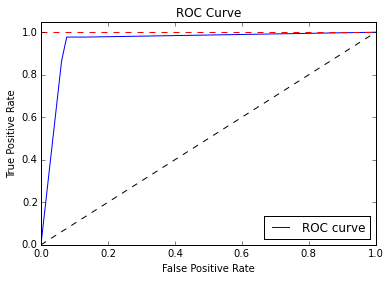

In [186]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [187]:
y_actual = label_binarize(y_test_votes, classes = ['democrat', 'republican'])
y_pred = label_binarize(log_test_pred_votes, classes = ['democrat', 'republican'])

In [188]:
fpr, tpr, thresholds = metrics.roc_curve(y_actual, log_test_prob_votes[:,1])
roc_auc = auc(fpr, tpr)

In [189]:
fpr

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01538462,  0.01538462,  0.01538462,  0.01538462,  0.01538462,
        0.01538462,  0.01538462,  0.01538462,  0.03076923,  0.03076923,
        0.03076923,  0.03076923,  0.04615385,  0.06153846,  0.07692308,
        0.09230769,  0.10769231,  0.12307692,  0.13846154,  0.15384615,
        0.16923077,  0.18461538,  0.2       ,  0.21538462,  0.23076923,
        0.24615385,  0.26153846,  0.27692308,  0.29230769,  0.33846154,
        0.35384615,  0.36923077,  0.38461538,  0.4       ,  0.41538462,
        0.44615385,  0.46153846,  0.47692308,  0.49230769,  0.50769231,
        0.55384615,  0.56923077,  0.58461538,  0.6       ,  0.61538462,
        0.63076923,  0.64615385,  0.66153846,  0.67692308,  0.69

In [190]:
tpr

array([ 0.04545455,  0.06818182,  0.09090909,  0.18181818,  0.20454545,
        0.22727273,  0.29545455,  0.31818182,  0.38636364,  0.40909091,
        0.43181818,  0.45454545,  0.47727273,  0.56818182,  0.59090909,
        0.65909091,  0.68181818,  0.70454545,  0.72727273,  0.75      ,
        0.75      ,  0.77272727,  0.79545455,  0.81818182,  0.84090909,
        0.86363636,  0.88636364,  0.90909091,  0.93181818,  0.95454545,
        0.97727273,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [191]:
roc_auc

0.99493006993006994

Populating the interactive namespace from numpy and matplotlib


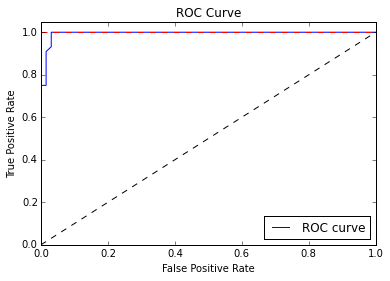

In [192]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Classification Challenge 3

In [119]:
test_scores = cross_val_score(gnb_model, X_train, y_train)

In [120]:
test_scores

array([ 0.86363636,  0.97222222,  0.9537037 ])

In [132]:
fpr, tpr, thresholds = roc_curve(cross_val_score(gnb_model, X_train, y_train))
roc_auc = auc(fpr, tpr)

TypeError: roc_curve() takes at least 2 arguments (1 given)

## Classification Challenge 04 (completed)

In [159]:
precision_recall_fscore_support(y_test_movie, y_pred_movie, pos_label = None, average = None)

(array([ 0.6741573 ,  0.25531915]),
 array([ 0.63157895,  0.29268293]),
 array([ 0.65217391,  0.27272727]),
 array([95, 41]))

## Classification Challenge 05 (completed)

In [165]:
y_actual = label_binarize(y_test_med, classes = [1, 2])
y_pred = label_binarize(y_pred_med, classes = [1, 2])

In [167]:
fpr, tpr, thresholds = roc_curve(y_actual, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.52138849929873776

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


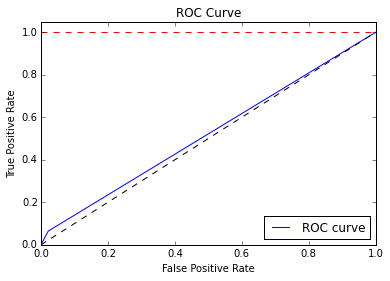

In [168]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()